In [ ]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
import numpy as np

worksheet = gc.open('Prompts and Responses V_2').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Sl No.,Primary Topic,Secondary Topic,Generation Type,Prompts,Responses,Likelihood,Perplexity,Confidence Score,Accomplished Task 1?,Accomplished Task 2?,Both Task Achieved,Both Tasks Failed,Single Task Achieved,Analysis,,,,
1,1,Text Generation,Sentiment Analysis,Top-p p =0.8,Write a positive paragraph about artificial in...,Artificial intelligence is one of the key tech...,0.89,96.27,0.13,1,1,1,0,0,Model understood prompt and provided a basic s...,,,,
2,2,Text Generation,Sentiment Analysis,Top-p p =0.8,Write a negative paragraph about artificial in...,I think we need to be more vigilant and judici...,0.46,2.18,0.17,1,1,1,0,0,Model understood prompt and provided a basic s...,,,,
3,3,Text Generation,Sentiment Analysis,Top-p p =0.8,Return the paragraph. Task 1: Write 120 words ...,Capitalism is not just about the economy. Capi...,0.97,54.99,0.16,1,1,1,0,0,Length of response increased with different ge...,,,,
4,4,Text Generation,Sentiment Analysis,Top-p p =0.8,Return the paragraph. Task 1: Write 120 words ...,Capitalism is bad for the environment and it i...,0.85,637.92,0.11,1,1,1,0,0,"Same settings, but asking about negative aspec...",,,,


In [ ]:
for col in range(np.array(rows).shape[1]):
  if rows[0][col] == 'Perplexity':
    perp = col
  elif rows[0][col] == 'Likelihood':
    likli = col
  elif rows[0][col] == 'Confidence Score':
    conf = col
  elif rows[0][col] == 'Both Task Achieved':
    bta = col
  elif rows[0][col] == 'Single Task Achieved':
    sta = col
  elif rows[0][col] == 'Both Tasks Failed':
    btf = col

# Text Generation - Sentiment Analysis

In [ ]:
perplexity_scores_twot_tgsa = []
perplexity_scores_onet_tgsa = []
perplexity_scores_zerot_tgsa = []
likelihood_scores_twot_tgsa = []
likelihood_scores_onet_tgsa = []
likelihood_scores_zerot_tgsa = []
confidence_scores_twot_tgsa = []
confidence_scores_onet_tgsa = []
confidence_scores_zerot_tgsa = []

for i in range(1, 26):
  if float(rows[i][perp]) < 1000 :
    if int(rows[i][bta]) == 1 :
      perplexity_scores_twot_tgsa.append(float(rows[i][perp]))
      likelihood_scores_twot_tgsa.append(float(rows[i][likli]))
      confidence_scores_twot_tgsa.append(float(rows[i][conf])*500)
    elif int(rows[i][sta]) == 1:
      perplexity_scores_onet_tgsa.append(float(rows[i][perp]))
      likelihood_scores_onet_tgsa.append(float(rows[i][likli]))
      confidence_scores_onet_tgsa.append(float(rows[i][conf])*500)
    else:
      perplexity_scores_zerot_tgsa.append(float(rows[i][perp]))
      likelihood_scores_zerot_tgsa.append(float(rows[i][likli]))
      confidence_scores_zerot_tgsa.append(float(rows[i][conf])*500)


Scatter plot

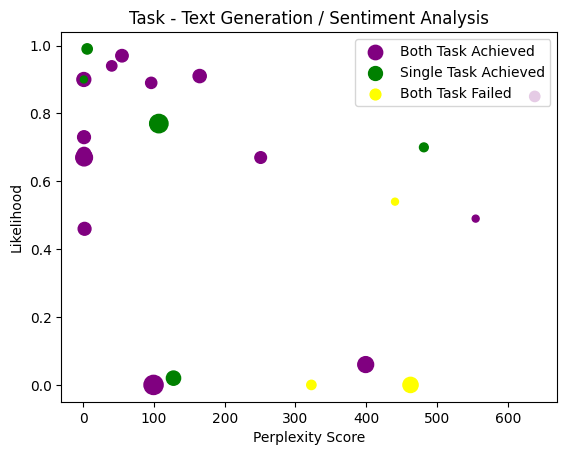

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perplexity_scores_twot_tgsa, likelihood_scores_twot_tgsa, c = 'purple', label='Both Task Achieved', s=confidence_scores_twot_tgsa)
plt.scatter(perplexity_scores_onet_tgsa, likelihood_scores_onet_tgsa, c = 'green', label='Single Task Achieved', s=confidence_scores_onet_tgsa)
plt.scatter(perplexity_scores_zerot_tgsa, likelihood_scores_zerot_tgsa, c = 'yellow', label='Both Task Failed', s=confidence_scores_zerot_tgsa)
plt.xlabel('Perplexity Score')
plt.ylabel('Likelihood')
plt.legend(loc='upper right')
plt.title("Task - Text Generation / Sentiment Analysis")
plt.show()

Box Plots

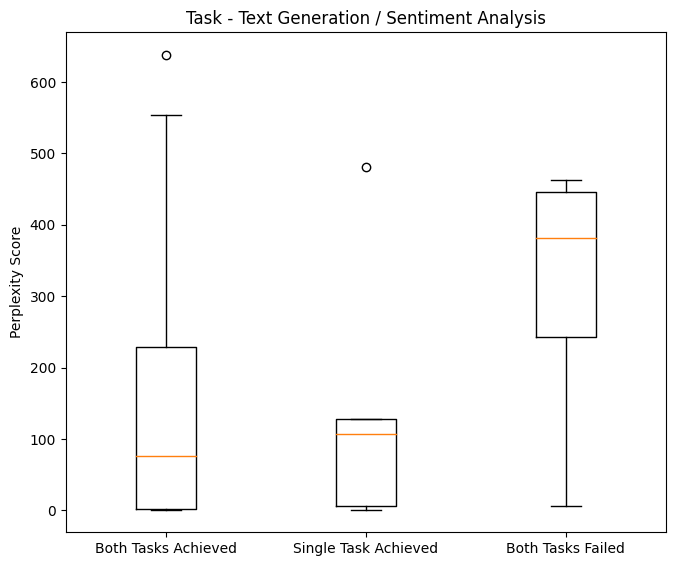

In [ ]:
data = [perplexity_scores_twot_tgsa, perplexity_scores_onet_tgsa, perplexity_scores_zerot_tgsa]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Perplexity Score')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Generation / Sentiment Analysis")
plt.show()

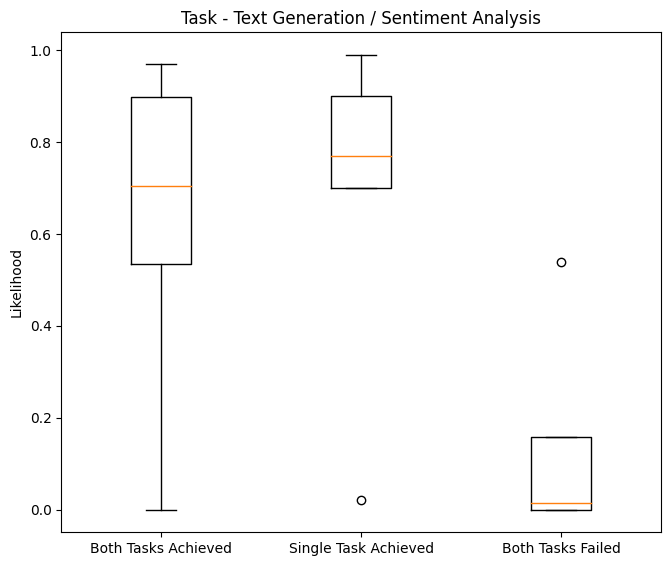

In [ ]:
data = [likelihood_scores_twot_tgsa, likelihood_scores_onet_tgsa, likelihood_scores_zerot_tgsa]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Likelihood')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Generation / Sentiment Analysis")
plt.show()

# Text Summarization - Sentiment Analysis

In [ ]:
perplexity_scores_twot_tssa = []
perplexity_scores_onet_tssa = []
perplexity_scores_zerot_tssa = []
likelihood_scores_twot_tssa = []
likelihood_scores_onet_tssa = []
likelihood_scores_zerot_tssa = []
confidence_scores_twot_tssa = []
confidence_scores_onet_tssa = []
confidence_scores_zerot_tssa = []


for i in range(26, 51):
  if float(rows[i][perp]) < 1200 :
    if int(rows[i][bta]) == 1 :
      perplexity_scores_twot_tssa.append(float(rows[i][perp]))
      likelihood_scores_twot_tssa.append(float(rows[i][likli]))
      confidence_scores_twot_tssa.append(float(rows[i][conf])*300)
    elif int(rows[i][sta]) == 1:
      perplexity_scores_onet_tssa.append(float(rows[i][perp]))
      likelihood_scores_onet_tssa.append(float(rows[i][likli]))
      confidence_scores_onet_tssa.append(float(rows[i][conf])*300)
    else:
      perplexity_scores_zerot_tssa.append(float(rows[i][perp]))
      likelihood_scores_zerot_tssa.append(float(rows[i][likli]))
      confidence_scores_zerot_tssa.append(float(rows[i][conf])*300)


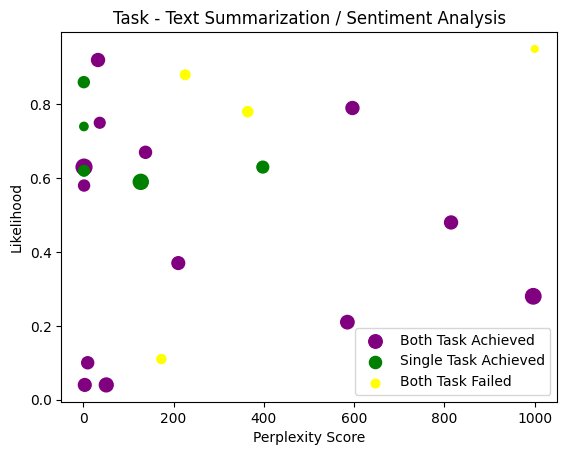

In [ ]:
plt.scatter(perplexity_scores_twot_tssa, likelihood_scores_twot_tssa, c = 'purple', label='Both Task Achieved', s=confidence_scores_twot_tssa)
plt.scatter(perplexity_scores_onet_tssa, likelihood_scores_onet_tssa, c = 'green', label='Single Task Achieved', s=confidence_scores_onet_tssa)
plt.scatter(perplexity_scores_zerot_tssa, likelihood_scores_zerot_tssa, c = 'yellow', label='Both Task Failed', s=confidence_scores_zerot_tssa)
plt.xlabel('Perplexity Score')
plt.ylabel('Likelihood')
plt.legend(loc='lower right')
plt.title("Task - Text Summarization / Sentiment Analysis")
plt.show()

Box Plots

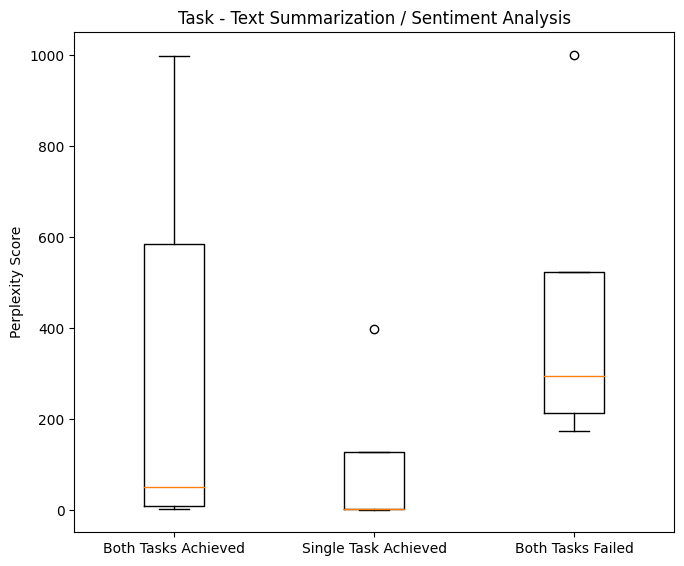

In [ ]:
data = [perplexity_scores_twot_tssa, perplexity_scores_onet_tssa, perplexity_scores_zerot_tssa]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Perplexity Score')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Summarization / Sentiment Analysis")
plt.show()

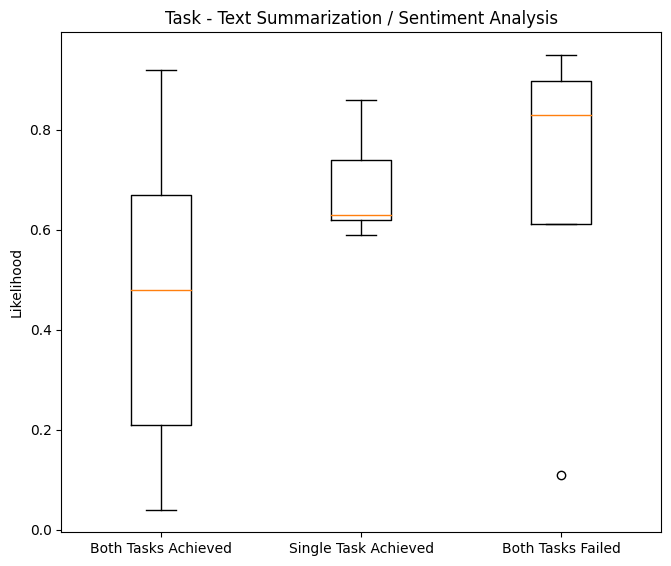

In [ ]:
data = [likelihood_scores_twot_tssa, likelihood_scores_onet_tssa, likelihood_scores_zerot_tssa]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Likelihood')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Summarization / Sentiment Analysis")
plt.show()

# Text Generation - Text Summarization

In [ ]:
perplexity_scores_twot_tgts = []
perplexity_scores_onet_tgts = []
perplexity_scores_zerot_tgts = []
likelihood_scores_twot_tgts = []
likelihood_scores_onet_tgts = []
likelihood_scores_zerot_tgts = []
confidence_scores_twot_tgts = []
confidence_scores_onet_tgts = []
confidence_scores_zerot_tgts = []


for i in range(51, 71):
  if float(rows[i][perp]) < 1000 :
    if int(rows[i][bta]) == 1 :
      perplexity_scores_twot_tgts.append(float(rows[i][perp]))
      likelihood_scores_twot_tgts.append(float(rows[i][likli]))
      confidence_scores_twot_tgts.append(float(rows[i][conf])*300)
    elif int(rows[i][sta]) == 1:
      perplexity_scores_onet_tgts.append(float(rows[i][perp]))
      likelihood_scores_onet_tgts.append(float(rows[i][likli]))
      confidence_scores_onet_tgts.append(float(rows[i][conf])*300)
    else:
      perplexity_scores_zerot_tgts.append(float(rows[i][perp]))
      likelihood_scores_zerot_tgts.append(float(rows[i][likli]))
      confidence_scores_zerot_tgts.append(float(rows[i][conf])*300)

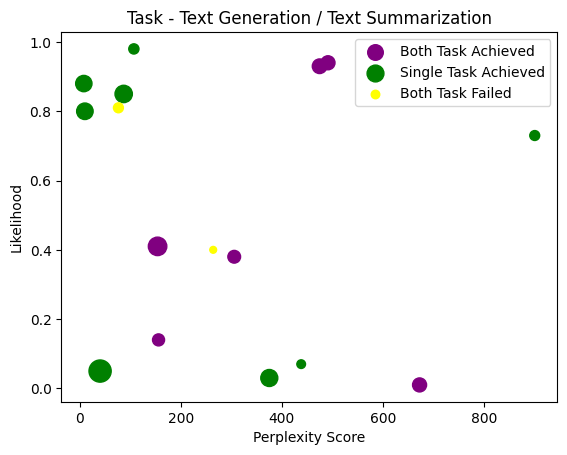

In [ ]:
plt.scatter(perplexity_scores_twot_tgts, likelihood_scores_twot_tgts, c = 'purple', label='Both Task Achieved', s=confidence_scores_twot_tgts)
plt.scatter(perplexity_scores_onet_tgts, likelihood_scores_onet_tgts, c = 'green', label='Single Task Achieved', s=confidence_scores_onet_tgts)
plt.scatter(perplexity_scores_zerot_tgts, likelihood_scores_zerot_tgts, c = 'yellow', label='Both Task Failed', s=confidence_scores_zerot_tgts)
plt.xlabel('Perplexity Score')
plt.ylabel('Likelihood')
plt.legend(loc='upper right')
plt.title("Task - Text Generation / Text Summarization")
plt.show()

Box Plots

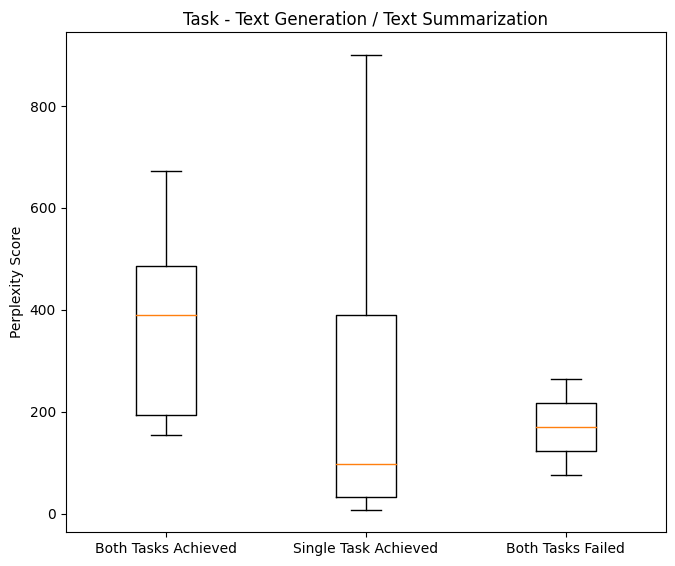

In [ ]:
data = [perplexity_scores_twot_tgts, perplexity_scores_onet_tgts, perplexity_scores_zerot_tgts]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Perplexity Score')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Generation / Text Summarization")
plt.show()

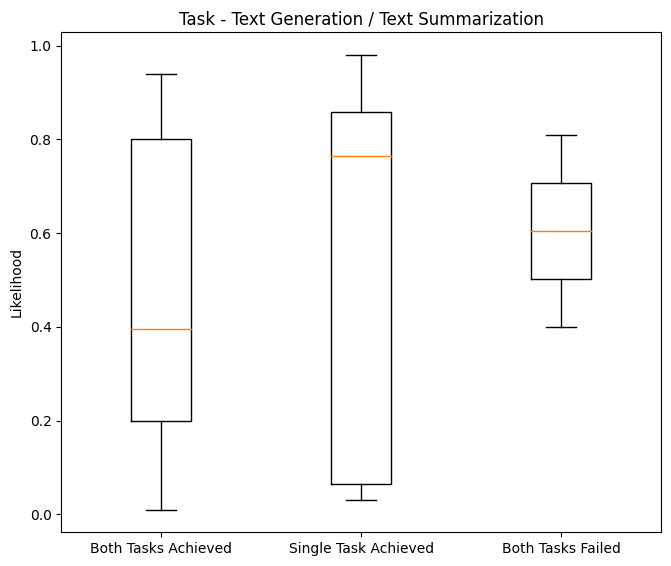

In [ ]:
data = [likelihood_scores_twot_tgts, likelihood_scores_onet_tgts, likelihood_scores_zerot_tgts]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.ylabel('Likelihood')
ax.set_xticklabels(['Both Tasks Achieved', 'Single Task Achieved', 'Both Tasks Failed'])
plt.title("Task - Text Generation / Text Summarization")
plt.show()